In [1]:
import pandas as pd
from ollama import chat
from ollama import ChatResponse
from tqdm import tqdm

In [2]:
df = pd.read_csv('./Datasets/test_set-ANT.csv')
X = df['Neutralized SMILES']
y = df['ATC Codes']

In [3]:
X[1]

'Cn1c(=O)c2c(ncn2CCNCC(O)c2ccc(O)c(O)c2)n(C)c1=O'

In [4]:
df

,Neutralized SMILES,ATC Codes,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpMAD_A,...,nG12FAHRing,SRW03,SRW05,SRW07,SRW09,ATC_level1,ATC_level2,ATC_level3,ATC_level4,multiple_ATC
0,CN(C)c1ccc(O)c2c1C[C@H]1C[C@H]3[C@H](N(C)C)C(O...,A01AB; D10AF; J01AA,26.067060,21.457796,0,1,40.137325,2.651875,5.303750,1.216283,...,0,0.0,0.000000,0.000000,0.000000,"['J', 'A', 'D']","['D10', 'A01', 'J01']","['A01A', 'J01A', 'D10A']","['D10AF', 'J01AA', 'A01AB']",True
1,Cn1c(=O)c2c(ncn2CCNCC(O)c2ccc(O)c(O)c2)n(C)c1=O,C01CA,20.907864,17.027531,0,1,34.502355,2.514216,4.947627,1.277865,...,0,0.0,2.397895,4.727388,6.861711,['C'],['C01'],['C01C'],['C01CA'],False
2,CC(C)=CCC1C(=O)N(c2ccccc2)N(c2ccccc2)C1=O,M01AX; M02AA,18.539255,15.705028,0,0,31.004484,2.530576,4.891268,1.291854,...,0,0.0,2.397895,4.948760,7.208600,['M'],"['M02', 'M01']","['M02A', 'M01A']","['M01AX', 'M02AA']",True
3,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,N05AB,23.587910,17.129344,0,2,38.805135,2.501762,5.003525,1.293504,...,1,0.0,0.000000,0.000000,0.000000,['N'],['N05'],['N05A'],['N05AB'],False
4,COc1cc(N)c(Cl)cc1C(=O)NC1CCN(CCCOc2ccc(F)cc2)C...,A03FA,24.317429,18.240404,0,1,41.041522,2.398415,4.796831,1.282548,...,0,0.0,0.000000,0.000000,0.000000,['A'],['A03'],['A03F'],['A03FA'],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,CNS(=O)(=O)Cc1ccc2[nH]cc(CCN(C)C)c2c1,G01AE; N02CC,15.304979,13.342089,0,1,24.479286,2.433993,4.773135,1.223964,...,0,0.0,2.397895,4.727388,6.823286,"['G', 'N']","['G01', 'N02']","['G01A', 'N02C']","['G01AE', 'N02CC']",True
715,CO/N=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(COC(N)...,J01DC; J01RA; S01AA,22.212688,18.808559,1,0,36.417076,2.574286,5.148124,1.255761,...,0,0.0,2.397895,4.442651,6.293419,"['J', 'S']","['S01', 'J01']","['J01D', 'S01A', 'J01R']","['J01RA', 'J01DC', 'S01AA']",True
716,CCCCc1oc2ccc(NS(C)(=O)=O)cc2c1C(=O)c1ccc(OCCCN...,C01BD,29.375323,21.933108,0,1,48.942693,2.510979,4.898097,1.254941,...,0,0.0,2.397895,4.844187,7.050123,['C'],['C01'],['C01B'],['C01BD'],False
717,CN/C(=N/C#N)NCCSCc1nc[nH]c1C,A02BA,12.089765,11.136291,0,3,21.154703,2.257483,4.368546,1.244394,...,0,0.0,2.397895,4.595120,6.529419,['A'],['A02'],['A02B'],['A02BA'],False


In [6]:
s_smiles = X[1]
response: ChatResponse = chat(
    model='3gemma-3finetuned', 
    messages=[{"role": "user", "content": s_smiles}],#N06BX 
)
print(response['message']['content'])

M03BA; M03BB; S01GA; S01GE; S01GX


In [8]:
if "predicted_atc4" not in df.columns:
    df["predicted_atc4"] = None
import asyncio
from ollama import AsyncClient

async def chat(message):
    response = await AsyncClient().chat(model='3gemma-3finetuned', messages=message)
    return response['message']['content']

for i in range(len(df)):
    smiles = df.at[i, "Neutralized SMILES"]
    message=[
        {"role": "user", "content": s_smiles}
    ]
    try:
      pred = await chat(message)
    except ollama.ResponseError as e:
      print('Error:', e.error)
      if e.status_code == 404:
        ollama.pull(model)
    df.at[i, "predicted_atc4"] = pred

    if i % 10 == 0:
        df.to_csv("3finetuned_predicted_atc4_partial.csv", index=False)
        print("Guardado parcial")

df.to_csv("3finetuned_predicted_atc4.csv", index=False)

Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parcial
Guardado parci

In [3]:
preds = pd.read_csv('3finetuned_predicted_atc4.csv')
preds = preds['predicted_atc4']

In [4]:
preds

0                                           J01CA; J01CR
1      L01AA; L01BA; R01AG; R01AG; R01AX; R01BA; R01B...
2        L01CA; L02BX; R02AA; R03AA; R03BA; R03CA; R03CE
3                                    G01AD; G04BX; J01AD
4      M03AG; R03AJ; R03AB; R03BB; R03CB; R03CC; R03X...
                             ...                        
714                           M03BA; S01XA; S02GA; S03BA
715    C01BA; R01AD; R01AG; R01AK; R03AJ; R03AM; R03B...
716                                         M03AG; M03AX
717                                         C01AA; C01CA
718    L01AA; L01BA; R01BA; R03AC; R03AK; R03AG; R03C...
Name: predicted_atc4, Length: 719, dtype: object

In [5]:
# Convert a string that simulates a list to a real list
def convert_string_list(element):
    # Delete [] of the string
    element = element[0:len(element)]
    # Create a list that contains each code as e.g. 'A'
    ATC_list = list(element.split('; '))
    for index, code in enumerate(ATC_list):
        # Delete '' of the code
        ATC_list[index] = code[0:len(code)]
    return ATC_list

In [6]:
clear_preds = []
for i, pred in enumerate(preds):
    preds_list = convert_string_list(pred)
    preds_list = set(preds_list)
    clear_preds_i = []
    for p in preds_list:
        if len(p) == 5:
            if p[0].isalpha():
                if p[1:3].isnumeric():
                    if p[3].isalpha():
                        if p[4].isalpha():
                            clear_preds_i.append(p)
                        else:
                            clear_preds_i.append("Invalid prediction")
                    else:
                        clear_preds_i.append("Invalid prediction")
                else:
                    clear_preds_i.append("Invalid prediction")    
            else:
                clear_preds_i.append("Invalid prediction")
        else:
            clear_preds_i.append("Invalid prediction")
    clear_preds.append(clear_preds_i)
clear_preds

[['J01CA', 'J01CR'],
 ['L01BA', 'S01GE', 'L01AA', 'S01GA', 'R01AX', 'R01BA', 'R01AG', 'R01BB'],
 ['R03CA', 'R03AA', 'R03BA', 'R02AA', 'L02BX', 'R03CE', 'L01CA'],
 ['J01AD', 'G04BX', 'G01AD'],
 ['M03AG',
  'R03CB',
  'S01BC',
  'S01CM',
  'S01CB',
  'R03BB',
  'R03AB',
  'R03AJ',
  'R03XC',
  'S01BB',
  'S01CA',
  'S01XX',
  'R03CC'],
 ['L01XX', 'L01XA'],
 ['M03AG', 'M03BA'],
 ['C01GA', 'R03AD', 'R03AJ', 'C01CA', 'C01AA', 'C11AA', 'R03AL'],
 ['C03XA', 'C03XY', 'R03CB', 'R03BA'],
 ['R01AA',
  'S02CA',
  'S02BE',
  'R01CC',
  'J01CA',
  'S01AE',
  'J01CR',
  'S02CG',
  'R01AG'],
 ['A05AG', 'R01AA', 'S01BC', 'R01AB', 'R02AJ', 'R01AC'],
 ['S03AA', 'S01EB', 'R06AB', 'S02BC', 'G01AD'],
 ['J01CA', 'J01CR'],
 ['N02AC'],
 ['C01BA'],
 ['R01AX', 'C01AA', 'R01BA'],
 ['G01AE', 'C01AA', 'G02BX'],
 ['J01BA', 'J01CR'],
 ['S01EB', 'R01AD', 'R06AA', 'M03BA', 'S02AA'],
 ['S01FB',
  'S01EB',
  'R03GL',
  'R03GA',
  'R03XC',
  'R03BA',
  'C01BA',
  'R03FA',
  'R03CC',
  'R03LX'],
 ['C02CB', 'C01CA', 'R07AD'

In [7]:
print(clear_preds.count("Invalid prediction"))
print(len(clear_preds)-clear_preds.count("Invalid prediction"))

0
719


In [8]:
import matplotlib.pyplot as plt
from collections import defaultdict
counter = defaultdict(int)

for pred in clear_preds:
    set_preds = set(pred)
    for p in set_preds:
        if p != "Invalid prediction":
            counter[p] += 1
counter

defaultdict(int,
            {'J01CA': 11,
             'J01CR': 10,
             'L01BA': 49,
             'S01GE': 19,
             'S01GA': 82,
             'R01AX': 49,
             'R01BA': 69,
             'R01AG': 21,
             'L01AA': 61,
             'R01BB': 13,
             'R03CA': 22,
             'R03AA': 26,
             'R03BA': 70,
             'R02AA': 76,
             'L01CA': 25,
             'L02BX': 3,
             'R03CE': 1,
             'J01AD': 3,
             'G04BX': 2,
             'G01AD': 6,
             'M03AG': 10,
             'S01BC': 36,
             'R03CB': 57,
             'S01CM': 1,
             'S01CB': 3,
             'R03BB': 45,
             'R03AB': 9,
             'R03AJ': 36,
             'R03XC': 8,
             'S01BB': 12,
             'S01CA': 10,
             'S01XX': 10,
             'R03CC': 56,
             'L01XX': 27,
             'L01XA': 20,
             'M03BA': 73,
             'C01GA': 13,
             'R03AD': 4,
     

In [9]:
len(counter)

582

In [10]:
counter_preds = defaultdict(int)
for pred in clear_preds:
    set_preds = set(pred)
    counter_preds[len(set_preds)] += 1
print(counter_preds)

defaultdict(<class 'int'>, {2: 188, 8: 23, 7: 29, 3: 146, 13: 8, 4: 69, 9: 23, 6: 43, 5: 54, 1: 77, 10: 19, 17: 4, 16: 7, 14: 5, 11: 9, 26: 1, 15: 3, 12: 5, 18: 1, 19: 3, 22: 1, 20: 1})


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 26]


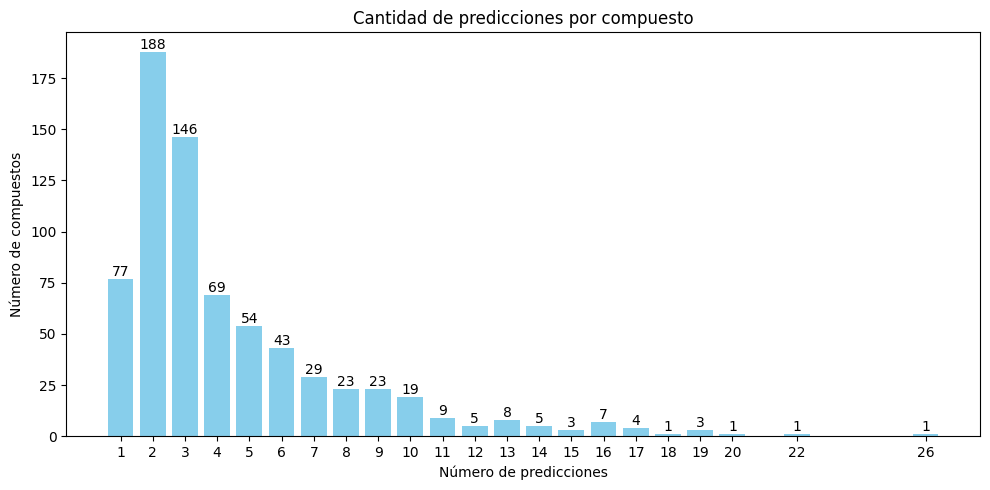

In [11]:
dict_preds = dict(sorted(counter_preds.items()))

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

codes = list(dict_preds.keys())
print(codes)
counts = list(dict_preds.values())

p = ax.bar(codes, counts, color='skyblue')
ax.bar_label(p)
ax.set_xticks(codes)
plt.title('Cantidad de predicciones por compuesto')
plt.xlabel('Número de predicciones')
plt.ylabel('Número de compuestos')
plt.tight_layout()

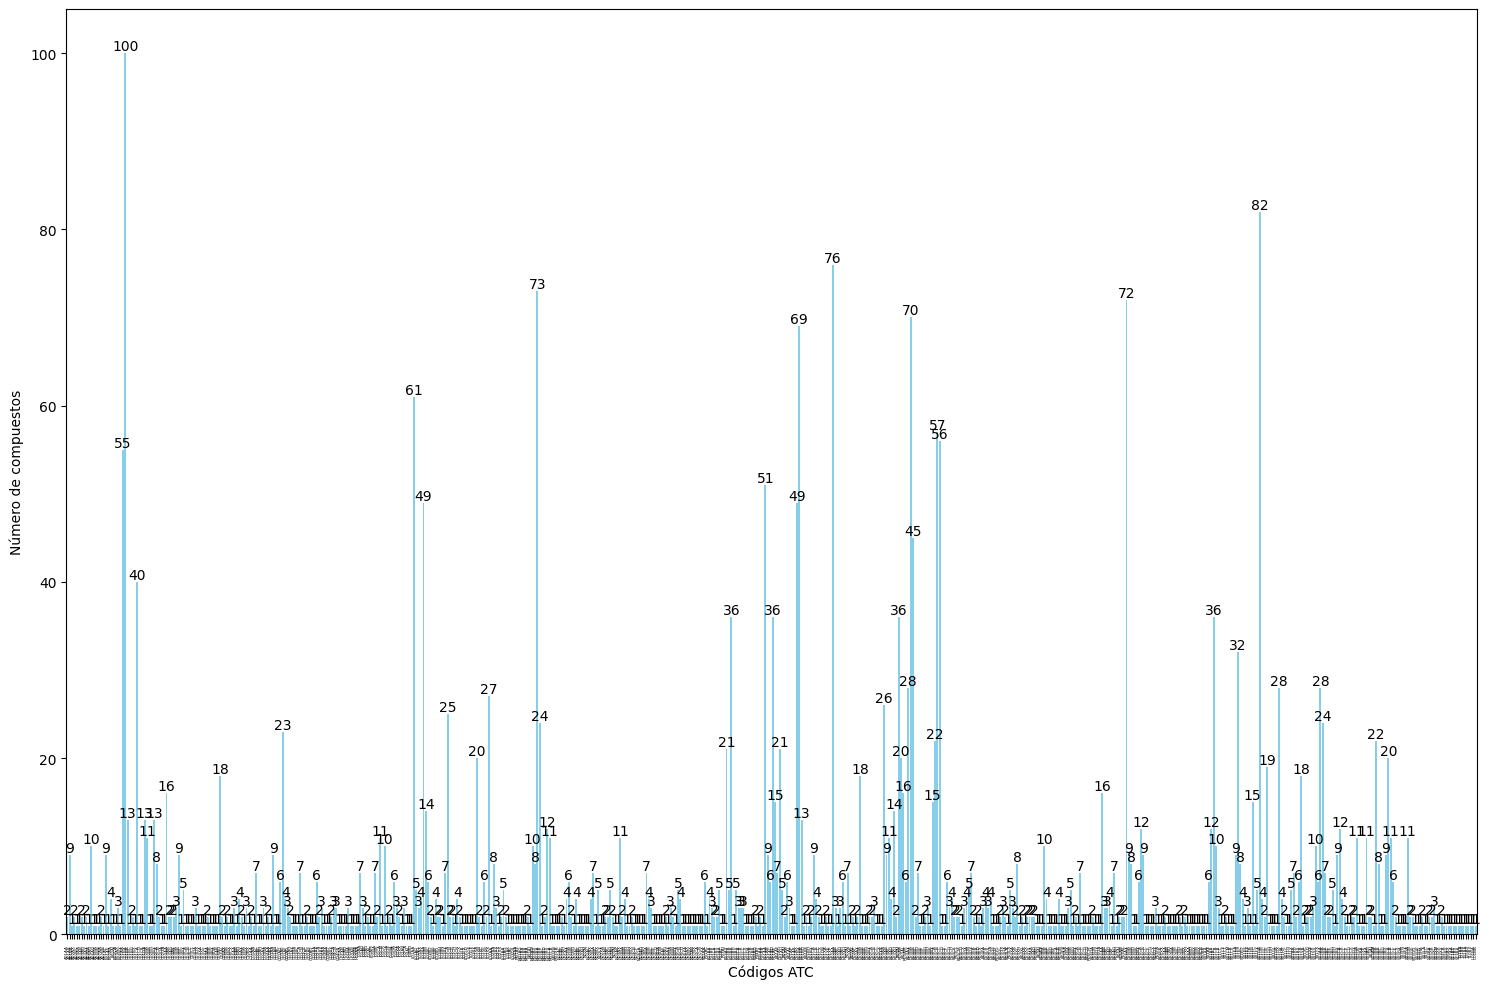

In [12]:
dict_level1 = dict(sorted(counter.items()))

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
codes = list(dict_level1.keys())
counts = list(dict_level1.values())
x_pos = list(range(len(codes)))

p = ax.bar(x_pos, counts, color='skyblue', width=0.8)
ax.bar_label(p)
plt.subplots_adjust(left=0.03, right=0.97)
plt.xlabel('Códigos ATC')
plt.ylabel('Número de compuestos')
labels = list(dict_level1.keys())
step = 1  
half_width = 0.8 / 2
ax.set_xlim(min(x_pos) - half_width, max(x_pos) + half_width)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels[::step], rotation=90, fontsize=3)
plt.tight_layout()
plt.show()

defaultdict(<class 'int'>, {3: 25, 1: 559, 2: 115, 4: 8, 7: 2, 5: 4, 11: 1, 8: 1, 16: 1, 6: 1, 9: 2})
[1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 16]


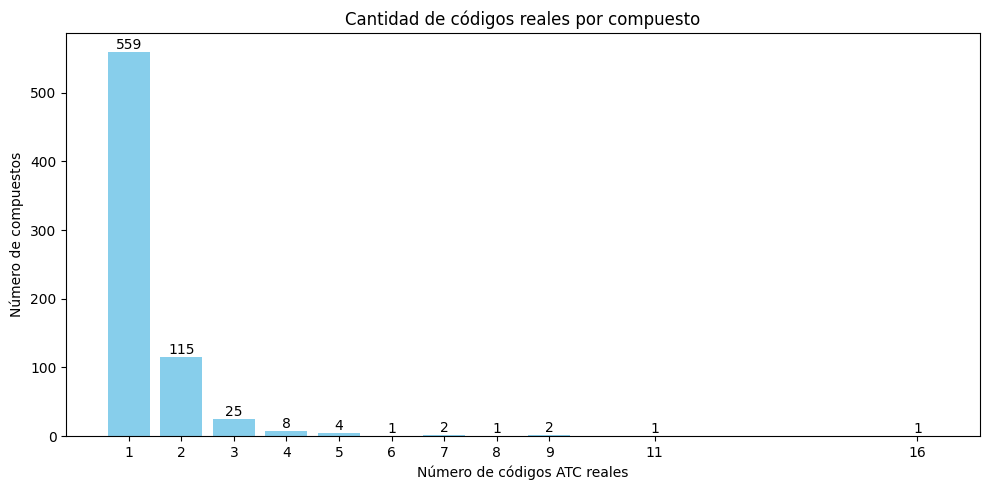

In [15]:
counter_real = defaultdict(int)
for row in df['ATC Codes']:
    ATC_list = convert_string_list(row)
    counter_real[len(ATC_list)] += 1
print(counter_real)
dict_real = dict(sorted(counter_real.items()))

fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)

codes = list(dict_real.keys())
print(codes)
counts = list(dict_real.values())

p = ax.bar(codes, counts, color='skyblue')
ax.bar_label(p)
ax.set_xticks(codes)
plt.title('Cantidad de códigos reales por compuesto')
plt.xlabel('Número de códigos ATC reales')
plt.ylabel('Número de compuestos')
plt.tight_layout()

In [34]:
for i, pred in enumerate(clear_preds):
    if pred == "Invalid prediction":
        print(pred)

In [128]:
def precision(output_beam2, df_test):
    total_compounds = len(df_test)
    # Initialize counters for total matches and valid comparisons at each level
    total_matches = [0, 0, 0, 0]
    valid_comparisons = [total_compounds] * 4 # Start with all compounds being valid for comparison at every level
    # Iterate through the predictions for each compound
    for i, list_preds in enumerate(output_beam2):
        true_codes = df_test['ATC Codes'].iloc[i]
        true_codes = convert_string_list(true_codes)
        num_preds = [len(list_preds)]*4
        level_matches = [0, 0, 0, 0]
        not_compared = [False, True, True, True]
        # Compare predicted codes with true codes
        for p in list_preds:
            match_found = [False, False, False, False]
            for true_code in true_codes:
                # Compare each level
                if p[0] == true_code[0]:
                    match_found[0] = True
                    if p[1:3] == true_code[1:3]:
                        match_found[1] = True
                        if p[3] == true_code[3]:
                            match_found[2] = True
                            if p[4] == true_code[4]:
                                match_found[3] = True
            for level in range(4):
                if match_found[level]:
                    # If at least one time it can compare with level y+1 so it converts to False
                    # Level y has matched so it compares to level y+1
                    level_matches[level] += 1
                    if level+1 < 4:
                        not_compared[level+1] = False
                else:
                     if level+1 < 4:
                        num_preds[level+1] -= 1
        valid_comparisons = [valid_comparisons[level] - int(not_compared[level]) for level in range(4)]
        total_matches = [total_matches[level] + ((level_matches[level]/num_preds[level]) if num_preds[level] > 0 else 0) for level in range(4)]
    precisions = [total_matches[level] / valid_comparisons[level] if valid_comparisons[level] > 0 else 0 for level in range(4)]
    
    precision_1 = precisions[0] * 100
    precision_2 = precisions[1] * 100
    precision_3 = precisions[2] * 100
    precision_4 = precisions[3] * 100
    return precision_1, precision_2, precision_3, precision_4

In [129]:
def recall(output_beam2, df_test):
    # Load test dataset and initialize counters
    total_compounds = len(df_test)
    # Initialize counters for total matches and valid comparisons at each level
    total_matches = [0, 0, 0, 0]
    valid_comparisons = [total_compounds] * 4 # Start with all compounds being valid for comparison at every level

    # Iterate through the predictions for each compound
    for i, list_preds in enumerate(output_beam2):
        true_codes = df_test['ATC Codes'].iloc[i]
        true_codes = convert_string_list(true_codes)
        num_true_codes = [len(true_codes)]*4
        level_matches = [0, 0, 0, 0]
        not_compared = [False, True, True, True]
        # Compare true codes with predicted codes
        for true_code in true_codes:
            match_found = [False, False, False, False]
            for p in list_preds:
                # Compare each level
                if p[0] == true_code[0]:
                    match_found[0] = True
                    if p[1:3] == true_code[1:3]:
                        match_found[1] = True
                        if p[3] == true_code[3]:
                            match_found[2] = True
                            if p[4] == true_code[4]:
                                match_found[3] = True
            for level in range(4):
                if match_found[level]:
                    # If at least one time it can compare with level y+1 so it is converted to False
                    # Level y has matched so it compares to level y+1
                    level_matches[level] += 1
                    if level+1 < 4:
                        not_compared[level+1] = False
                else:
                    if level+1 < 4:
                        num_true_codes[level+1] -= 1        
        # For compound x it couldn't compare at level i so it has to decrease the amount of comparisons at level i for compound x
        valid_comparisons = [valid_comparisons[level] - int(not_compared[level]) for level in range(4)]
        total_matches = [total_matches[level] + ((level_matches[level]/num_true_codes[level]) if num_true_codes[level] > 0 else 0) for level in range(4)]

    recalls = [(total_matches[level] / valid_comparisons[level]) if valid_comparisons[level] > 0 else 0 for level in range(4)]
    
    recall_1 = recalls[0] * 100
    recall_2 = recalls[1] * 100
    recall_3 = recalls[2] * 100
    recall_4 = recalls[3] * 100
    return recall_1, recall_2, recall_3, recall_4

In [130]:
precision_1, precision_2, precision_3, precision_4 = precision(clear_preds, df)
recall_1, recall_2, recall_3, recall_4 = recall(clear_preds, df)

In [131]:
print(f"Precision level 1: {precision_1}")
print(f"Precision level 2: {precision_2}")
print(f"Precision level 3: {precision_3}")
print(f"Precision level 4: {precision_4}")

Precision level 1: 11.595292495864978
Precision level 2: 35.10970764395421
Precision level 3: 22.342549923195083
Precision level 4: 16.666666666666664


In [132]:
print(f"Recall level 1: {recall_1}")
print(f"Recall level 2: {recall_2}")
print(f"Recall level 3: {recall_3}")
print(f"Recall level 4: {recall_4}")

Recall level 1: 17.961988753017966
Recall level 2: 41.43835616438356
Recall level 3: 27.82258064516129
Recall level 4: 24.074074074074073


In [133]:
def metrics_calc(output_beam2, df_test):
    precisions = []
    recalls = []
    f1s = []
    from sklearn import metrics
    for i, preds in enumerate(output_beam2):
        ground_truth = convert_string_list(df_test['ATC Codes'].iloc[i])
        binary_predictions = []
        binary_ground_truth = []
        print(ground_truth)
        print(preds)
        set_pred_gt = list(set(preds + ground_truth))
        print(set_pred_gt)
        for code in set_pred_gt:
            if code in preds:
                binary_predictions.append(1)
            else:
                binary_predictions.append(0)
            if code in ground_truth:
                binary_ground_truth.append(1)
            else:
                binary_ground_truth.append(0)    
        print(binary_ground_truth)
        print(binary_predictions)
        precisions.append(metrics.precision_score(binary_ground_truth, binary_predictions, zero_division=0))
        recalls.append(metrics.recall_score(binary_ground_truth, binary_predictions))
        f1s.append(metrics.f1_score(binary_ground_truth, binary_predictions))
    return precisions, recalls, f1s

In [134]:
precisions, recalls, f1s = metrics_calc(clear_preds, df)

['A01AB', 'D10AF', 'J01AA']
['J01CA', 'J01CR']
['A01AB', 'J01CA', 'D10AF', 'J01CR', 'J01AA']
[1, 0, 1, 0, 1]
[0, 1, 0, 1, 0]
['C01CA']
['L01BA', 'S01GE', 'L01AA', 'S01GA', 'R01AX', 'R01BA', 'R01AG', 'R01BB']
['L01BA', 'S01GE', 'S01GA', 'R01AX', 'C01CA', 'R01BA', 'R01AG', 'L01AA', 'R01BB']
[0, 0, 0, 0, 1, 0, 0, 0, 0]
[1, 1, 1, 1, 0, 1, 1, 1, 1]
['M01AX', 'M02AA']
['R03CA', 'R03AA', 'R03BA', 'R02AA', 'L02BX', 'R03CE', 'L01CA']
['R03CA', 'R03AA', 'R03BA', 'R02AA', 'M01AX', 'L01CA', 'L02BX', 'M02AA', 'R03CE']
[0, 0, 0, 0, 1, 0, 0, 1, 0]
[1, 1, 1, 1, 0, 1, 1, 0, 1]
['N05AB']
['J01AD', 'G04BX', 'G01AD']
['J01AD', 'N05AB', 'G04BX', 'G01AD']
[0, 1, 0, 0]
[1, 0, 1, 1]
['A03FA']
['M03AG', 'R03CB', 'S01BC', 'S01CM', 'S01CB', 'R03BB', 'R03AB', 'R03AJ', 'R03XC', 'S01BB', 'S01CA', 'S01XX', 'R03CC']
['M03AG', 'S01BC', 'R03CB', 'S01CM', 'S01CB', 'R03BB', 'R03AB', 'R03AJ', 'R03XC', 'S01BB', 'S01CA', 'S01XX', 'R03CC', 'A03FA']
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [135]:
f1s

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.25,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.11764705882352941,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,

In [136]:
precisions_average = sum(precisions)/len(precisions)
recalls_average = sum(recalls)/len(recalls)
f1s_average = sum(f1s)/len(f1s)

In [137]:
print(precisions_average)
print(recalls_average)
print(f1s_average)

0.0007966014050854106
0.0050996754751970325
0.0011946996525250635
